In [1]:
# ! gsutil -m rsync -r gs://tesorai-data/nature_methods_submission/for_pride ../data/benchmark_results

In [2]:
import pandas as pd

import upsetplot
from upsetplot import UpSet

import sys
import os
from matplotlib import pyplot as plt
from tesorai_search import data_parsing_utils

/Users/mburq/miniconda3/envs/tesorai/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
_DATA_DIR = "../data/benchmark_results/"
benchmark = "bassani_sternberg"
# benchmark = "bekker_jensen"
benchmark_results = {
    "Tesorai": set(
        data_parsing_utils.get_tesorai_peptides(
            _DATA_DIR + f"{benchmark}/tesorai/pep_fdr.csv"
        )
    ),
    # "MaxQuant": set(
    #     data_parsing_utils.get_maxquant_peptides(
    #         _DATA_DIR + f"{benchmark}/maxquant/msms.txt"
    #     )
    # ),
    "FragPipe": set(
        data_parsing_utils.get_fragpipe_peptides(
            _DATA_DIR + f"{benchmark}/fragpipe/peptides.tsv"
        )
    ),
    "Peaks": set(
        data_parsing_utils.get_peaks_peptides(
            _DATA_DIR + f"{benchmark}/peaks/peptides.csv"
        )
    ),
    "Proteome Discoverer": set(
        data_parsing_utils.get_pd_peptides(
            _DATA_DIR + f"{benchmark}/proteome_discoverer/peptides.xlsx"
        )
    ),

}

Found 47393 peptides by TS
Found 38849 peptides by fragpipe from 38849 unique rows
Found 44396 peptides by PEAKS from 49774 unique rows
Found 35882 peptides by PD from 37941 unique rows


/Users/mburq/miniconda3/envs/tesorai/lib/python3.11/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/Users/mburq/miniconda3/envs/tesorai/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles[

<Figure size 1000x600 with 0 Axes>

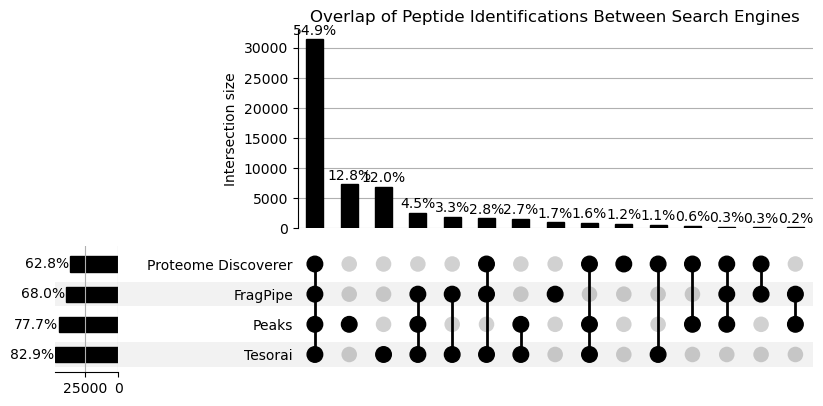

In [4]:
from_contents = upsetplot.from_contents(benchmark_results)

# Create and customize the plot
fig = plt.figure(figsize=(10, 6))
upset = UpSet(
    from_contents, sort_by="cardinality", show_percentages=True, 
    # min_subset_size=300,
)
upset.plot()
plt.title("Overlap of Peptide Identifications Between Search Engines")
plt.show()

/Users/mburq/miniconda3/envs/tesorai/lib/python3.11/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/Users/mburq/miniconda3/envs/tesorai/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles[

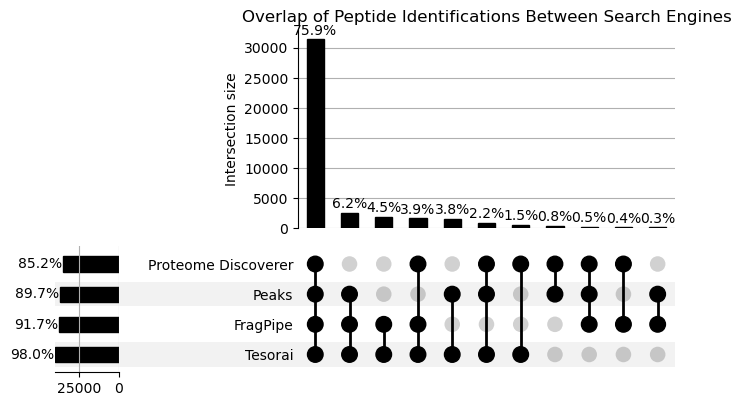

In [5]:
benchmark_results_robust = {}

for search_engine, peptides in benchmark_results.items():
    union_others = set()
    for other_engine, other_peptides in benchmark_results.items():
        if other_engine != search_engine:
            union_others.update(other_peptides)
    # Intersect with the union of all other search engines' peptides
    benchmark_results_robust[search_engine] = peptides.intersection(union_others)

from_contents = upsetplot.from_contents(benchmark_results_robust)

# Create upset plot after removing all entries that are unique to only one search engine
upset = UpSet(
    from_contents,
    sort_by="cardinality",
    show_percentages=True,
    # min_subset_size=300,
)
upset.plot()
plt.title("Overlap of Peptide Identifications Between Search Engines")
plt.show()